# Project: Concrete Compressive Strength Prediction
----
**Author**: Gosaye Emshaw  
**Date**: 9/16/2025  
**Purpose**: To develop end to end machine learning pipeline to predict the compresive strength of a concrete given features.  

----

## End -to-End Machine Learning Pipeline

----

### Table of Contents
1.  [Project Overview](#1-project-overview)
2.  [Business Objective](###2-business-objective)
3.  [Data Dictionary](#3-data-dictionary)
4.  [Import Libraries](#4-import-libraries)
5.  [Data Loading & Initial Inspection](#5-data-loading--initial-inspection)
6.  [Exploratory Data Analysis (EDA)](#6-exploratory-data-analysis-eda)
7.  [Data Preprocessing](#7-data-preprocessing)
8.  [Model Training & Evaluation](#8-model-training--evaluation)
9.  [Model Interpretation](#9-model-interpretation)
10. [Conclusion & Next Steps](#10-conclusion--next-steps)

### 1. Project Overview
This notebook documents the end-to-end process of building a machine learning model to predict the compressive strength of concrete based on its composition and age. The final model will be deployed as a REST API.  

**Tags:** `Regression`, `Random Forest`, `Feature Engineering`, `Model Deployment`


---

### 2. Business Objective
The goal is to create a tool that allows engineers and construction professionals to quickly estimate the final strength of a concrete mix design. This can help in optimizing material usage, reducing costs, and ensuring structural integrity before pouring.

**Success Metric:** Model performance will be evaluated using **Root Mean Squared Error (RMSE)** and **R² Score** on a held-out test set.

---

### 3. Data Dictionary
The dataset contains the following features:

| Feature | Description | Units | Type |
| :--- | :--- | :--- | :--- |
| `cement` | Amount of cement | kg/m³ | Continuous |
| `blast furnace slag` | Amount of blast furnace slag | kg/m³ | Continuous |
| `fly ash` | Amount of fly ash | kg/m³ | Continuous |
| `water` | Amount of water | kg/m³ | Continuous |
| `superplasticizer` | Amount of superplasticizer | kg/m³ | Continuous |
| `coarse aggregate` | Amount of coarse aggregate | kg/m³ | Continuous |
| `fine aggregate` | Amount of fine aggregate | kg/m³ | Continuous |
| `age` | Age of the concrete | Days | Integer |
| **`compressive strength`** | **Target Variable** | **MPa** | **Continuous** |

*Source: UCI Machine Learning Repository*

---

### 4. Import Libraries
import necessary packages upfront for data esploration, analysis, visualize, preprocessing, and model training.

In [1]:
print("=" * 50)
print("        IMPORT NECESSARY PACKAGES")
print("=" * 50)
# Standard library imports
import os
import warnings
warnings.filterwarnings('ignore') 

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set visualizations style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Machine Learning (Scikit-Learn)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Model persistence
import joblib

print("All necessary pakages have imported")

        IMPORT NECESSARY PACKAGES
All necessary pakages have imported


### 5. Data Loading and Initial Inspection
Now let's load the dataset and do initial overview

In [2]:
print("=" * 50)
print("        LOAD THE DATASET")
print("=" * 50)
# Load the dataset
concrete = pd.read_csv("../data/Concrete_Data.csv")
print("The dataset loaded successfully!")

        LOAD THE DATASET
The dataset loaded successfully!


In [3]:
# Initial inspection of the dataset
print("=" * 50)
print("        INITIAL INSPECTION")
print("=" * 50)

print(f"Total Samples: {concrete.shape[0]}")
print(f"Total Features: {concrete.shape[1]}")
print(f"Features: {concrete.columns.to_list()}")
print("Target Variable: Compressive strength")
print(f"Concrete strength range: {concrete['compressive strength'].min()} - {concrete['compressive strength'].max()} MPa")

        INITIAL INSPECTION
Total Samples: 1030
Total Features: 9
Features: ['cement', 'blast furnace slag', 'fly ash', 'water', 'superplasticizer', 'coarse aggregate', 'fine aggregate', 'age', 'compressive strength']
Target Variable: Compressive strength
Concrete strength range: 2.33 - 82.6 MPa


In [4]:
# Missing values check
print("=" * 50)
print("        MISSING VALUES CHECK")
print("=" * 50)
display(concrete.isnull().sum())

# Data types
print("=" * 50)
print("        DATA TYPES")
print("=" * 50)
display(concrete.dtypes)

# Basic statistics
print("=" * 50)
print("        BASIC STATISTICS")
print("=" * 50)
display(concrete.describe())

        MISSING VALUES CHECK


cement                  0
blast furnace slag      0
fly ash                 0
water                   0
superplasticizer        0
coarse aggregate        0
fine aggregate          0
age                     0
compressive strength    0
dtype: int64

        DATA TYPES


cement                  float64
blast furnace slag      float64
fly ash                 float64
water                   float64
superplasticizer        float64
coarse aggregate        float64
fine aggregate          float64
age                       int64
compressive strength    float64
dtype: object

        BASIC STATISTICS


,cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


As we can see from features there are 8 features that will determine the compresive strength of the concrete. From these fetures cmnt, water, course aggregate and fine aggregate are must have components of the concrete so they must affect highly on the strength.

The age of the concrete also major effect on the strenght as most concretes reach 90% of there strength after 14 days. On the other hand blast furnace slag and fly ash supplimentary materials for cement tha increase strength, durability and resistance to chemical attack and also reduce cost of concrete by replacing portion of cement.

superplasticizer is an admixture added to increase the strength of the concrete by reduce the amount of water.

Since most of features are essential for the strength feature enginnering may help in this case.

I think water to cement ratio, age and superplasticizer are going to be the major contributers for the compressive strength of the concrete.

#### 5.1 Feature Engineering Hypotheses
we are gonna try different new features from the combination of existing features. 
- Water to cemnt ratio *water/cement)
- superplasticizer to cement ratio (superplasticizer/cement)
- fly ash to cement ratio (fly ash/cement)
- water to fly ash ratio (water/flyash
- superplasticizer to water ratio (superplasticizer/water)
- fine aggregate to coarse aggregate ratio (fine aggregate/coarse aggregate)
- water to blast furnace slag ratio (water/blast furnace slag)
- blast furnace slag to cement (blast furnace slag/cement)
- water to fine aggregate ratio (water/fine aggregate)

After try the above features we may find more critical features and also they may lead to other new features.

Beside that after EDA we will decide which features need scaling or transformation.

### 6-exploratory-data-analysis-eda
The main purpose of EDA is:
1. Visualize the distribution of features
2. Do complete statistical analysis of all features
3. Visualize the relationship of features and target feature
4. Quantify the relation of features with target feature using correlation
5. Quantify the correlation of all features with each other
6. expementing different combination of features

#### 6.1 Distribution Analysis

        DISTRIBUTION ANALYSIS OF FEATURES


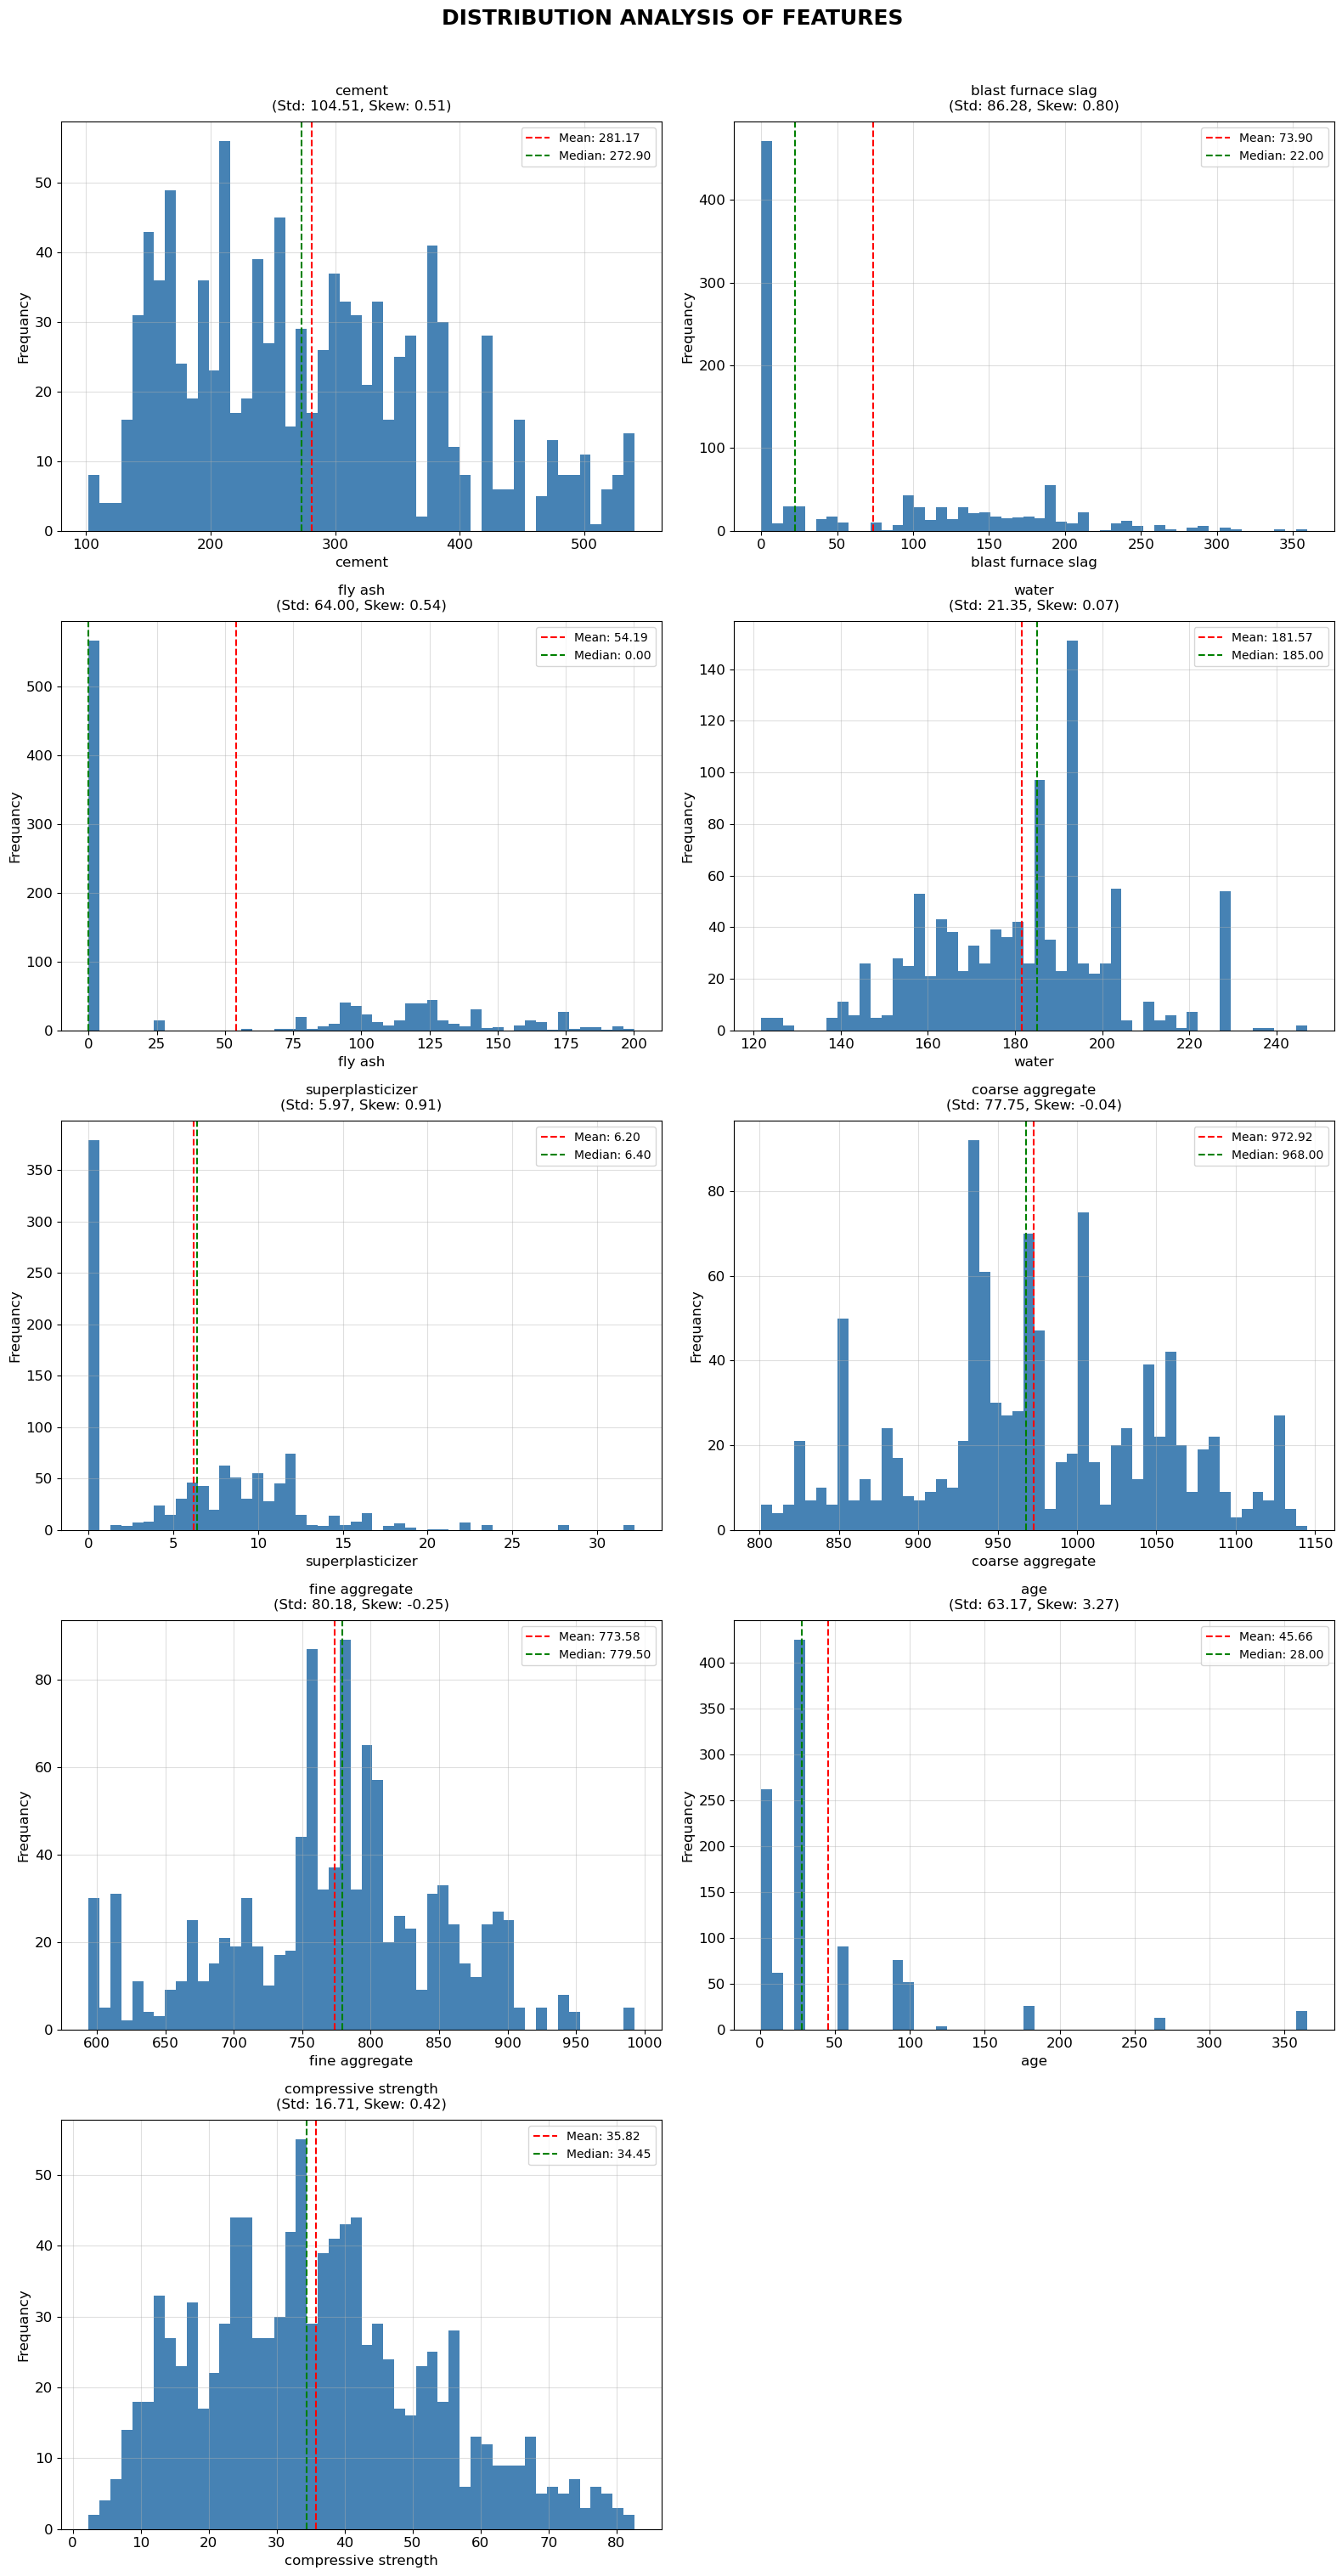

In [5]:
print("=" * 50)
print("        DISTRIBUTION ANALYSIS OF FEATURES")
print("=" * 50)
# First let's create a copy of our dataset
concrete_eda = concrete.copy()

fig, axes = plt.subplots(5, 2, figsize = (16, 30))
fig.suptitle("DISTRIBUTION ANALYSIS OF FEATURES", fontsize = 18, fontweight = 'bold', y = 1.01)

axes_flat = axes.flatten()

for i, col in enumerate(concrete_eda.columns):
    if i >= 9:
        break
    mean = concrete_eda[col].mean()
    median = concrete_eda[col].median()
    std = concrete_eda[col].std()
    
    axes_flat[i].hist(concrete_eda[col], bins = 50, color = 'steelblue')
    axes_flat[i].axvline(mean, color = 'red', linestyle = '--', label = f"Mean: {mean:.2f}")
    axes_flat[i].axvline(median, color = 'green', linestyle = '--', label = f"Median: {median:.2f}")
    axes_flat[i].set_title(f'{col}\n(Std: {std:.2f}, Skew: {concrete_eda[col].skew():.2f})', 
                    fontsize=12, pad=10)
    axes_flat[i].set_xlabel(col)
    axes_flat[i].set_ylabel("Frequancy")
    axes_flat[i].grid(True, alpha = 0.4)
    axes_flat[i].legend(fontsize = 10)

for j in range(len(concrete_eda.columns), len(axes_flat)):
    fig.delaxes(axes_flat[j])
plt.tight_layout()
plt.savefig("../reports/figures/distribution_analysis_of_features.png", dpi = 300, bbox_inches  = 'tight')
plt.show()

As we can see from the distribution plots most of features are skewed and their range is difference so we need scaling and transformation

In [6]:
print("=" * 50)
print("        DEAILED STATISTICAL SUMMARY")
print("=" * 50)

def stat_summary(df):
    """Create a detailed statistical summary"""

    stats = df.describe().T
    stats['missing'] = df.isna().sum()
    stats['missing_pct'] = (df.isna().sum()/len(df)) * 100
    stats['skewness'] = df.skew()
    stats['kurtosis'] = df.kurtosis()
    stats['range'] = stats['max'] - stats['min']
    stats['iqr'] = stats['75%'] - stats['25%']

    return stats
stat_summary(concrete_eda)

        DEAILED STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max,missing,missing_pct,skewness,kurtosis,range,iqr
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,0,0.0,0.509481,-0.520652,438.00,157.625
blast furnace slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,0,0.0,0.800717,-0.508175,359.40,142.950
fly ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,0,0.0,0.537354,-1.328746,200.10,118.300
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,0,0.0,0.074628,0.122082,125.20,27.100
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,0,0.0,0.907203,1.411269,32.20,10.200
coarse aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,0,0.0,-0.040220,-0.599016,344.00,97.400
fine aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,0,0.0,-0.253010,-0.102177,398.60,93.050
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,0,0.0,3.269177,12.168989,364.00,49.000
compressive strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,0,0.0,0.416977,-0.313725,80.27,22.425


#### 6.2 Feature-Target Relationship Analysis

        FEATURE-TARGET RELATIONSHIP ANALYSIS


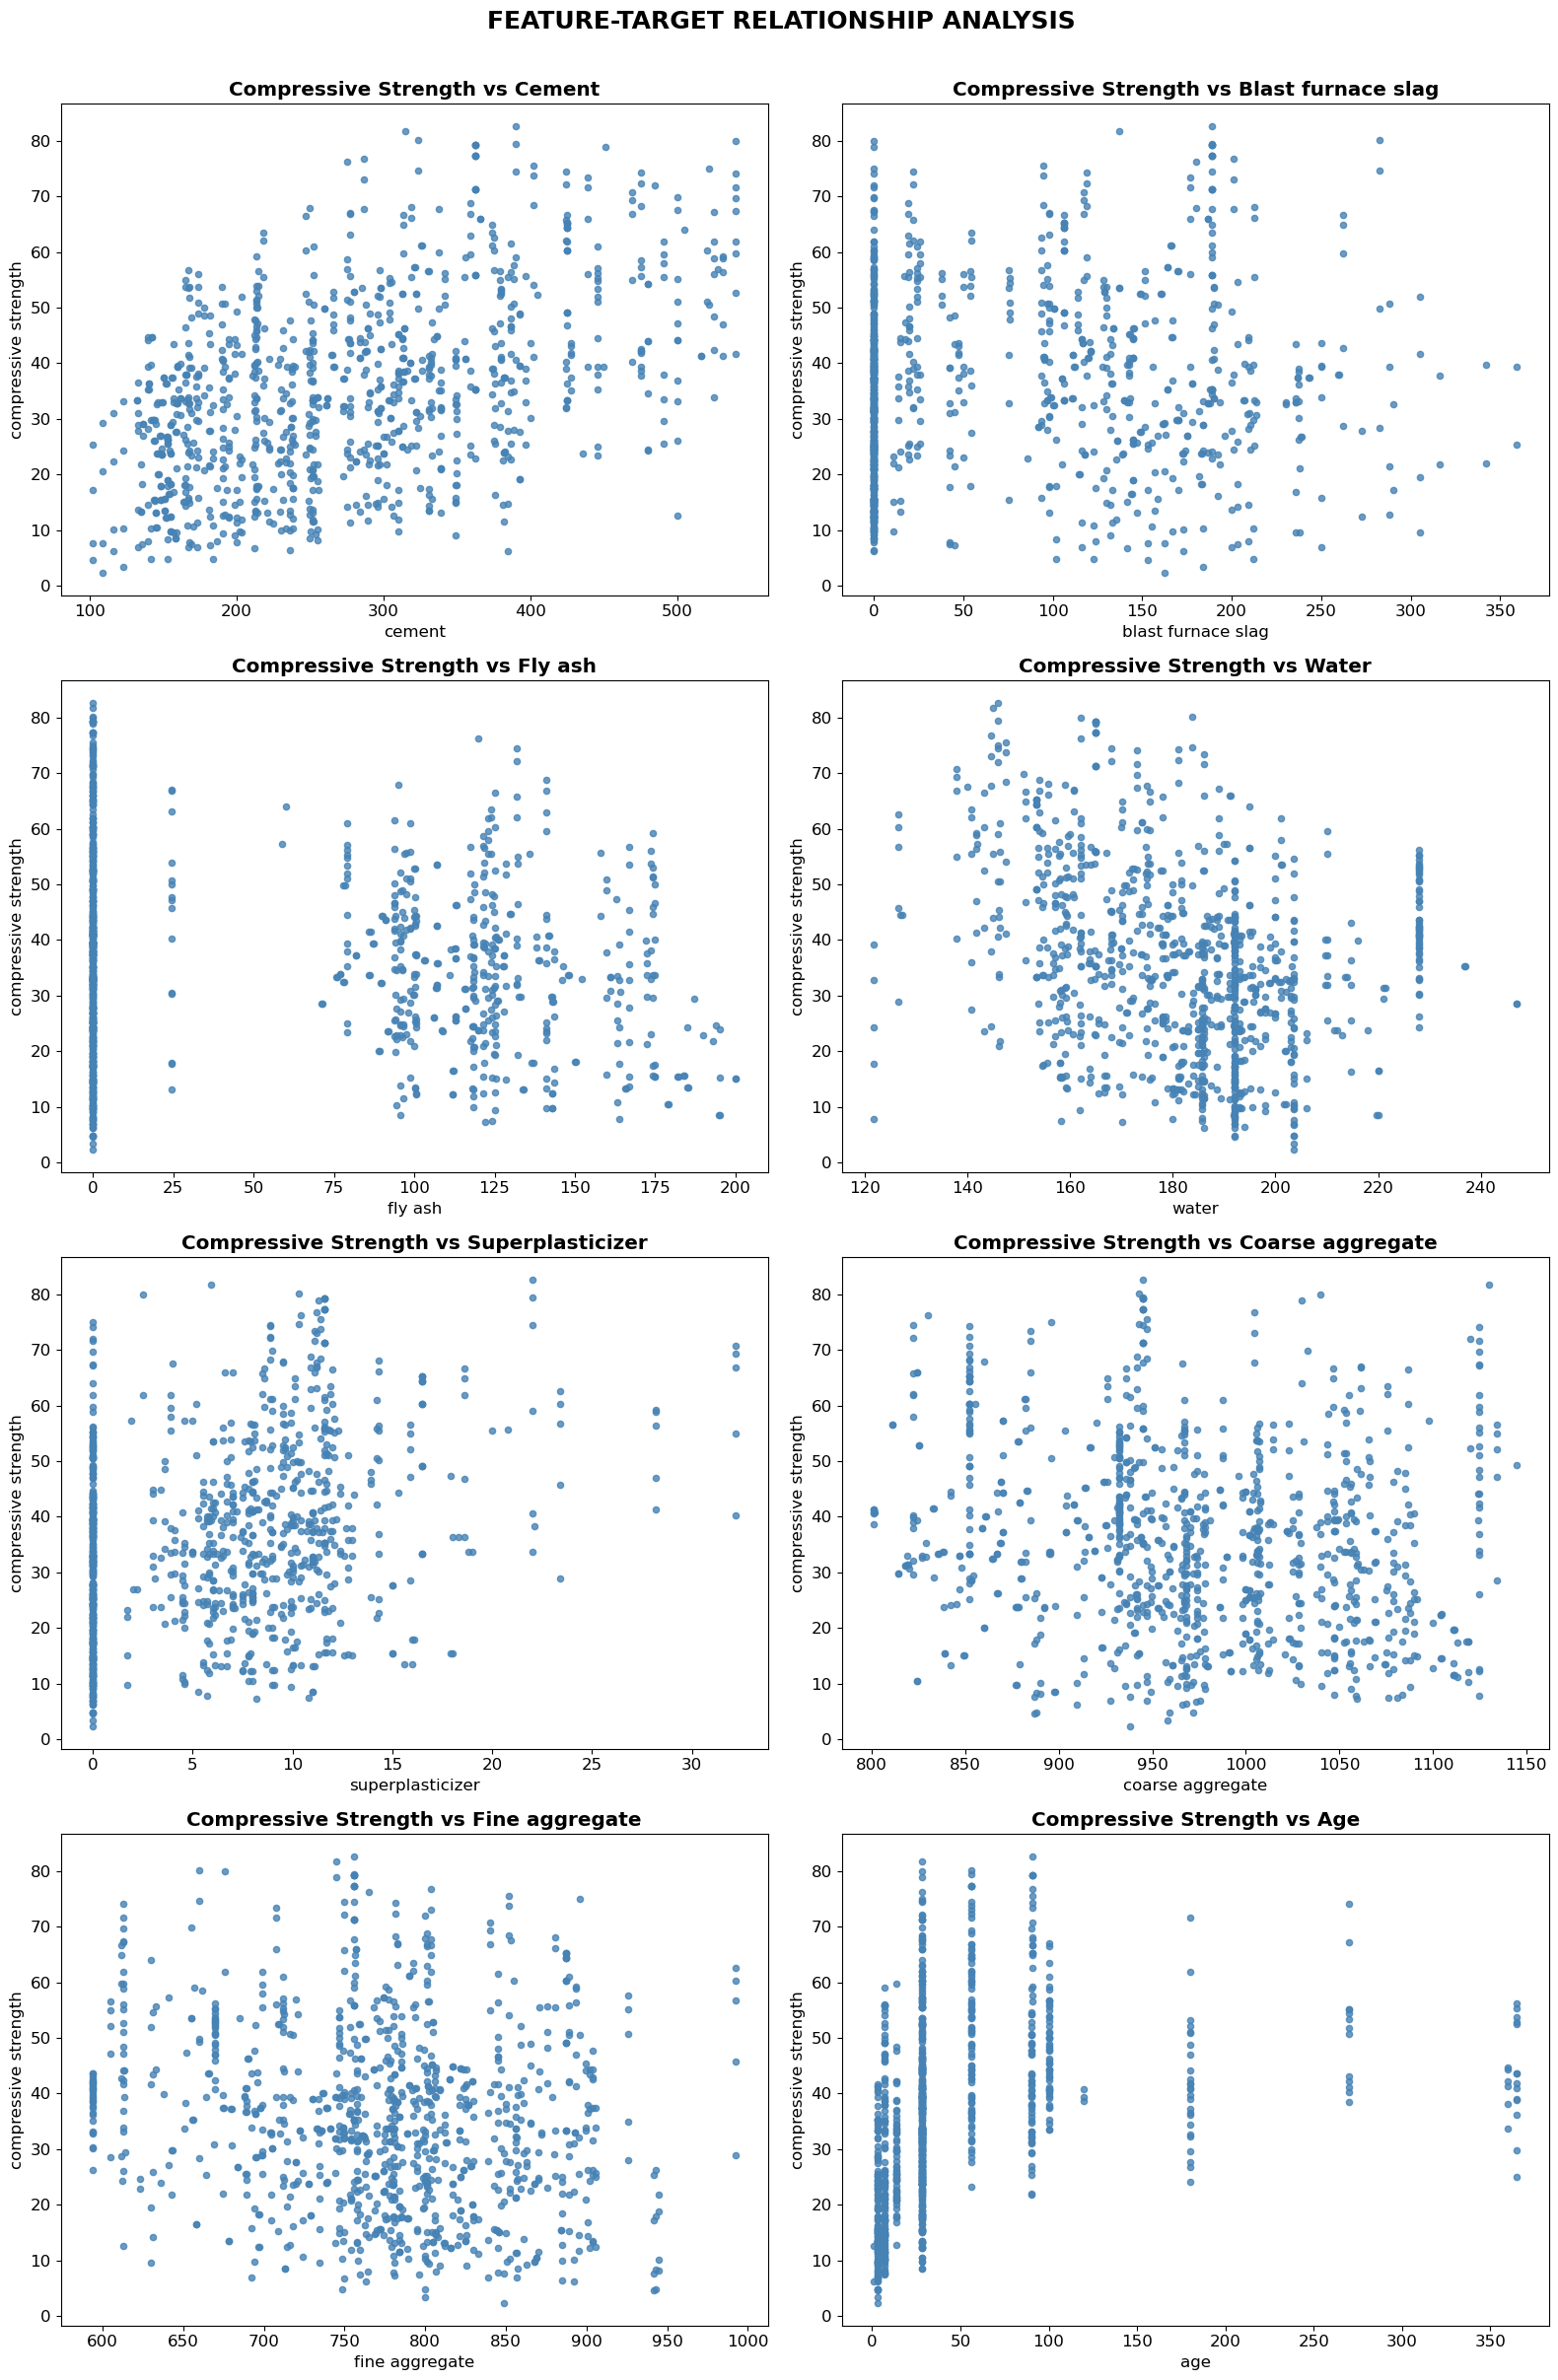

In [7]:
print("=" * 50)
print("        FEATURE-TARGET RELATIONSHIP ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(4, 2, figsize = (16, 24))
fig.suptitle("FEATURE-TARGET RELATIONSHIP ANALYSIS", fontsize = 18, fontweight = 'bold', y = 1.005)

features = [col for col in concrete_eda.columns if col != 'compressive strength']
axes_flat = axes.flatten()

for i, feature in enumerate(features):
    if i >= 8:
        break

    axes_flat[i].scatter(concrete_eda[feature], concrete_eda['compressive strength'], color = 'steelblue', alpha = 0.8, s = 20)
    axes_flat[i].set_title(f"Compressive Strength vs {feature.capitalize()}", fontweight = 'semibold')
    axes_flat[i].set_xlabel(feature)
    axes_flat[i].set_ylabel("compressive strength")

plt.tight_layout()
plt.savefig("../reports/figures/feature_target_relationship_analysis.png", dpi = 300, bbox_inches = 'tight')
plt.show()

#### 6.3 Target-Feature Correlation Analysis

In [8]:
print("=" * 50)
print("        FEATURE -TARGET CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation with target
target_corr = concrete_eda.corr()['compressive strength'].drop('compressive strength').sort_values(key = abs, ascending = False)
print("\nFeatures ranked by correlation with comressive strength:")
print("=" * 45)
display(target_corr)

        FEATURE -TARGET CORRELATION ANALYSIS

Features ranked by correlation with comressive strength:


cement                0.497832
superplasticizer      0.366079
age                   0.328873
water                -0.289633
fine aggregate       -0.167241
coarse aggregate     -0.164935
blast furnace slag    0.134829
fly ash              -0.105755
Name: compressive strength, dtype: float64

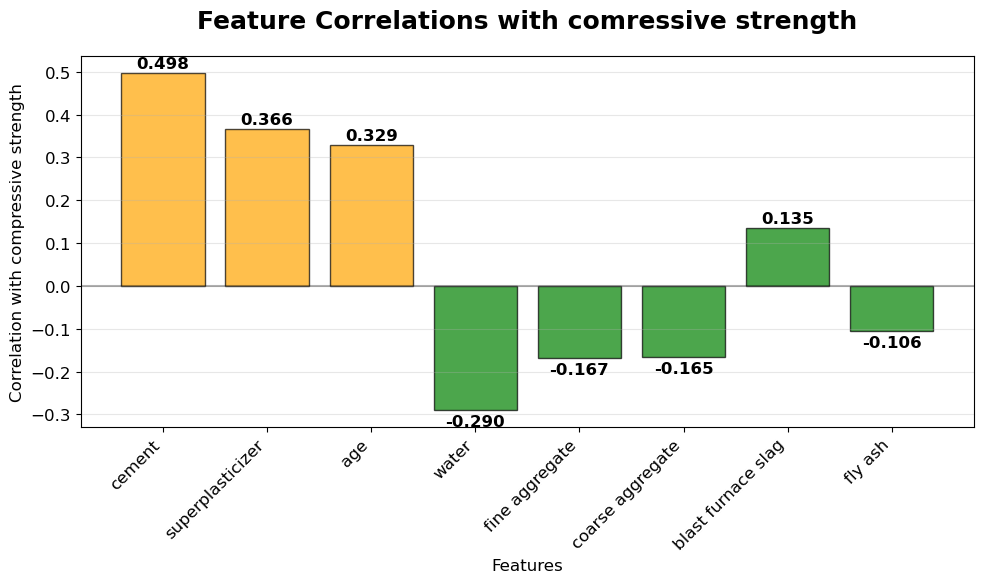

In [9]:
# Create a correlation plot
plt.figure(figsize=(10, 6))
colors = ['red' if abs(x) >= 0.5 else 'orange' if abs(x) >= 0.3 else 'green' for x in target_corr.values]
bars = plt.bar(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7, edgecolor='black')

# Add value labels on bars
for i, (feature, value) in enumerate(target_corr.items()):
    plt.text(i, value + (0.005 if value > 0 else -0.01), f'{value:.3f}', 
             ha='center', va='bottom' if value > 0 else 'top', fontweight='bold')

plt.title('Feature Correlations with comressive strength', fontsize=18, pad=20, fontweight = 'bold')
plt.xlabel('Features')
plt.ylabel('Correlation with compressive strength')
plt.xticks(range(len(target_corr)), target_corr.index, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig("../reports/figures/features_correlation_with_comressive_strength.png", dpi = 300, bbox_inches = 'tight')
plt.show()

#### 6.4 Features Interaction Analysis

        MULTIVARIATE CORRELATION ANALYSIS


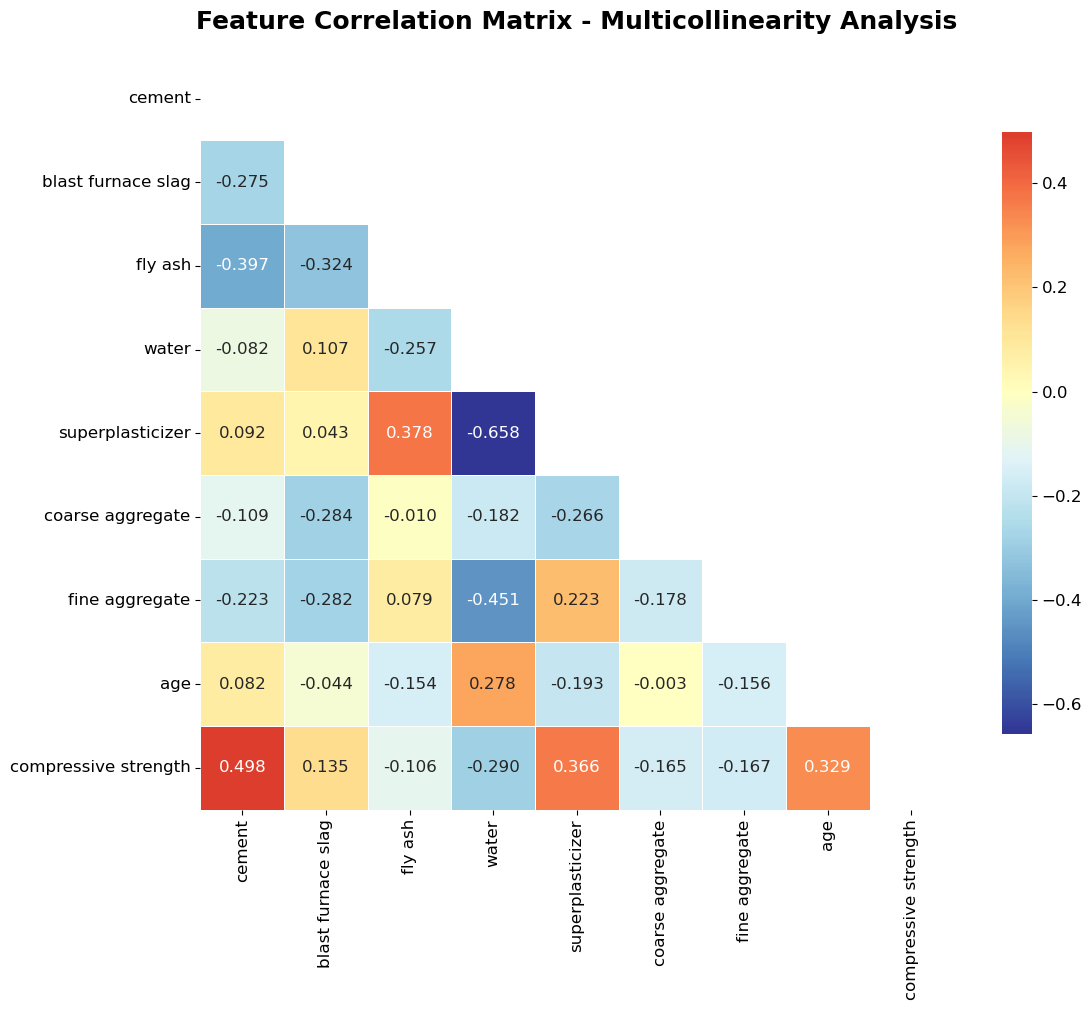

In [10]:
print("=" * 50)
print("        MULTIVARIATE CORRELATION ANALYSIS")
print("=" * 50)

# Create full correlation matrix
correlation_matrix = concrete_eda.corr()

# Enhanced correlation heatmap with annotations
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8},
            linewidths=0.5)

plt.title('Feature Correlation Matrix - Multicollinearity Analysis', fontsize=18, pad=20, fontweight = 'bold')
fig.savefig("../reports/figures/multivariate_correlation_analysis.png", dpi = 300, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

#### 6.5 Expermenting with Different Combinations

In [11]:
print("=" * 50)
print("        EXPERMENTING WITH DIFFERENT COMBINATIONS")
print("=" * 50)

feature_comb = {
    'water to cement ratio': concrete_eda['water']/concrete_eda['cement'],
    'superplasticizer to cement ratio': concrete_eda['superplasticizer']/concrete_eda['cement'],
    'fly ash to cement ratio': concrete_eda['fly ash']/concrete_eda['water'],
    'water to fly ash ratio': concrete_eda['water']/concrete_eda['fly ash'],
    'superplasticizer to water ratio': concrete_eda['superplasticizer']/concrete_eda['water'],
    'fine aggregate to coarse aggregate ratio': concrete_eda['fine aggregate']/concrete_eda['coarse aggregate'],
    'water to blast furnace slag ratio': concrete_eda['water']/concrete_eda['blast furnace slag'],
    'blast furnace slag to cement': concrete_eda['blast furnace slag']/concrete_eda['cement'],
    'water to fine aggregate ratio': concrete_eda['water']/concrete_eda['fine aggregate'],
    'cement to binder ratio': concrete_eda['cement']/(concrete_eda['cement'] + concrete_eda['blast furnace slag'] + concrete_eda['fly ash']),
    'fly ash to binder ratio': concrete_eda['fly ash']/(concrete_eda['cement'] + concrete_eda['blast furnace slag'] + concrete_eda['fly ash']),
    'water to binder ratio': concrete_eda['water']/(concrete_eda['cement'] + concrete_eda['blast furnace slag'] + concrete_eda['fly ash']),
    'fine aggregate to total aggregate': concrete_eda['fine aggregate']/(concrete_eda['fine aggregate'] + concrete_eda['coarse aggregate']),
    'coarse aggregate to total aggregate': concrete_eda['coarse aggregate']/(concrete_eda['fine aggregate'] + concrete_eda['coarse aggregate']),
    'cement x superplasticizer': concrete_eda['cement'] * concrete_eda['superplasticizer'],
    'water x superplasticizer': concrete_eda['water'] * concrete_eda['superplasticizer'],
    'cement x fly ash': concrete_eda['cement'] * concrete_eda['fly ash'],
    'cement x blast furnace slag': concrete_eda['cement'] * concrete_eda['blast furnace slag']
}

print("Try different Attribute Combinations:")
for feature_name, feature_values in feature_comb.items():
    # Handle potential division by zero or infinity
    feature_values = feature_values.replace([np.inf, -np.inf], np.nan)
    if feature_values.isna().sum() > 0:
        feature_values = feature_values.fillna(feature_values.median())
    
    correlation = feature_values.corr(concrete_eda['compressive strength'])
    print(f"{feature_name}: {correlation.round(3)}")

        EXPERMENTING WITH DIFFERENT COMBINATIONS
Try different Attribute Combinations:
water to cement ratio: -0.501
superplasticizer to cement ratio: 0.115
fly ash to cement ratio: -0.086
water to fly ash ratio: 0.058
superplasticizer to water ratio: 0.379
fine aggregate to coarse aggregate ratio: -0.015
water to blast furnace slag ratio: 0.058
blast furnace slag to cement: -0.069
water to fine aggregate ratio: -0.062
cement to binder ratio: 0.107
fly ash to binder ratio: -0.163
water to binder ratio: -0.623
fine aggregate to total aggregate: -0.029
coarse aggregate to total aggregate: 0.029
cement x superplasticizer: 0.457
water x superplasticizer: 0.339
cement x fly ash: 0.012
cement x blast furnace slag: 0.342


We have finished EDA. Main insights from our EDA.
1. Each feature have different range values cement 102 - 540 or coarse aggregate 801 - 1145 or superplasticizer 0 - 32. So this indicates we need scaling.
2. The age feature has a skewness of  3.27 so we have to transform the age feature
3. From our correlation analysis of existing features we have discovred cement = 0.498, superplasticizer = 0.366, age = 0.329, and water = -0.290 are good correlation with the compressive strength
4. From our feature combinations experiment surprisingly we have found more strong correlation with the target value than the existing one with watar to binder ratio = 0.623 with our strongest predictor, water to cement ratio = 0.501 second strongest, cement x superplasticizer = 0.457, superplasticizer to water ratio = 0.379, water x superplasticizer = 0.339, cement x blast furnace slag = 0.342 are othes strong features

### 7. Data Preprocessing
Now let's prepare our dataset based on the above EDA results and build end-to-end preprocessing pipeline

#### 7.1 Train Test Split
To avoid any leakage of data first let's separate the dataset in to train and test set (80 - 20%).

In [12]:
print("=" * 50)
print("        TRAIN TEST SPLIT")
print("=" * 50)
concrete_train, concrete_test = train_test_split(concrete, test_size = 0.2, random_state = 42)

print("The dataset splitted sucessfully!")
print(f"Train size: {concrete_train.shape[0]} samples")
print(f"Test size: {concrete_test.shape[0]} samples")

        TRAIN TEST SPLIT
The dataset splitted sucessfully!
Train size: 824 samples
Test size: 206 samples


In [13]:
print("=" * 50)
print("        SAVE THE FINAL TRAIN TEST DATASET")
print("=" * 50)

concrete_train_X = concrete_train.drop('compressive strength', axis = 1)

        SAVE THE FINAL TRAIN TEST DATASET
